In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("Datafiniti_Womens_Shoes.csv")

df.loc[:,['prices.size']]

,prices.size
0,S
1,6
2,6
3,6
4,6
...,...
9995,7.5
9996,7
9997,11
9998,6.5


In [3]:
#check if there are missing values

df['prices.size'].isnull().sum()

0

In [10]:
#check unique data and address the incosistency in data

df['prices.size'].unique()

array(['S', '6', '5', 'SMALL', 'MEDIUM', '7', '9', '8', '6.5', '10',
       '9.5', '8.5', '5.5', '8.5 WIDE', '9 WIDE', '7 WIDE', '6 WIDE',
       '7.5 WIDE', '11', '9.5 WIDE', '8 WIDE', '7.5', '11 WIDE', '8 MED',
       '5.5 MED', '5 MED', '9 MED', '6.5 MED', '6 MED', '7.5 MED',
       '9.5 MED', 'Medium', '4', '8.5 MED', '7 MED', '12', '12 MED',
       '10 WIDE', '6.5 WIDE', '10 MED', '11 MED', 'LARGE', '10.5 WIDE',
       '10.5', '12 WIDE', '5.5 WIDE', '5 WIDE', '10.5 MED', '40', '39',
       '42', '41', '38 WIDE', '37', '36 WIDE', '41 WIDE', '36', '40 WIDE',
       '38', '35', '11.5 WIDE', '11.5', '40.5', 'US 9.5/UK 8.0',
       'US 9.0/UK 7.5', 'US 8.5/UK 7.0', '41.5', '38.5', 'US 6.0/UK 4.5',
       'US 7.0/UK 5.5', 'US 10.0/UK 8.5', 'US 7.5/UK 6.0',
       'US 11.0/UK 9.5', 'US 10.5/UK 9.0', 'US 6.5/UK 5.0',
       'US 8.0/UK 6.5', '39.5', 'Mens 7.0/Womens 8.5',
       'Mens 7.5/Womens 9.0', 'Mens 8.5/Womens 10.0',
       'Mens 4.5/Womens 6.0', 'Mens 6.0/Womens 7.5',
       'Mens

In [16]:
#check unique data 
df['prices.size'] = df['prices.size'].str.lower()
df['prices.size'].unique()

array(['s', '6', '5', 'small', 'medium', '7', '9', '8', '6.5', '10',
       '9.5', '8.5', '5.5', '8.5 wide', '9 wide', '7 wide', '6 wide',
       '7.5 wide', '11', '9.5 wide', '8 wide', '7.5', '11 wide', '8 med',
       '5.5 med', '5 med', '9 med', '6.5 med', '6 med', '7.5 med',
       '9.5 med', '4', '8.5 med', '7 med', '12', '12 med', '10 wide',
       '6.5 wide', '10 med', '11 med', 'large', '10.5 wide', '10.5',
       '12 wide', '5.5 wide', '5 wide', '10.5 med', '40', '39', '42',
       '41', '38 wide', '37', '36 wide', '41 wide', '36', '40 wide', '38',
       '35', '11.5 wide', '11.5', '40.5', 'us 9.5/uk 8.0',
       'us 9.0/uk 7.5', 'us 8.5/uk 7.0', '41.5', '38.5', 'us 6.0/uk 4.5',
       'us 7.0/uk 5.5', 'us 10.0/uk 8.5', 'us 7.5/uk 6.0',
       'us 11.0/uk 9.5', 'us 10.5/uk 9.0', 'us 6.5/uk 5.0',
       'us 8.0/uk 6.5', '39.5', 'mens 7.0/womens 8.5',
       'mens 7.5/womens 9.0', 'mens 8.5/womens 10.0',
       'mens 4.5/womens 6.0', 'mens 6.0/womens 7.5',
       'mens 5.5/women

In [18]:
# address the incosistency in data

import re

#keep us size only

def extract_us_size(size):
    match_us = re.match(r'^us\s+(\d+(?:\.\d+)?)', size)
    if match_us:
        return match_us.group(1)
    return size

#keep womens size only

def extract_womens_size(size):
    match_womens = re.search(r'womens\s+(\d+(?:\.\d+)?)', size)
    if match_womens:
        return match_womens.group(1)
    return size

#keep size before med/wide

def extract_number_before_med_or_wide(size):
    match_med_or_wide = re.search(r'(\d+(?:\.\d+)?)\s+(?:med|wide)', size)
    if match_med_or_wide:
        return match_med_or_wide.group(1)
    return size

#replace s/small/medium/large with a number

def replace_values(value):
    replacements = {
        's': '5',
        'small': '5',
        'medium': '6',
        'large': '7'
    }
    return replacements.get(value, value)

# Apply the functions to the 'prices.size' column
df['prices.size']= df['prices.size'].apply(extract_us_size)
df['prices.size'] =df['prices.size'].apply(extract_womens_size)
df['prices.size']= df['prices.size'].apply(extract_number_before_med_or_wide)
df['prices.size'] = df['prices.size'].apply(replace_values)

print(df['prices.size'].unique())

['5' '6' '7' '9' '8' '6.5' '10' '9.5' '8.5' '5.5' '7.5' '11' '4' '12'
 '10.5' '40' '39' '42' '41' '38' '37' '36' '35' '11.5' '40.5' '9.0' '41.5'
 '38.5' '6.0' '7.0' '10.0' '11.0' '8.0' '39.5']


In [31]:
# change all values to numeric

df['prices.size'] = pd.to_numeric(df['prices.size'], errors='coerce')

print(df['prices.size'].unique())

print(df['prices.size'].max())


[ 5.   6.   7.   9.   8.   6.5 10.   9.5  8.5  5.5  7.5 11.   4.  12.
 10.5 40.  39.  42.  41.  38.  37.  36.  35.  11.5 40.5 41.5 38.5 39.5]
42.0


In [36]:
#converting EU sizes to US sizes


import pandas as pd

import numpy as np

n=df['prices.size']

# Conversion table: EU sizes mapped to corresponding US sizes
to_us_sizes = {
    '34': 4,
    '34.5': 4.5,
    '35': 5,
    '35.5': 5.5,
    '36': 6,
    '36.5': 6,
    '37': 6.5,
    '37.5': 7,
    '38': 7.5,
    '38.5': 7.5,
    '39': 8,
    '39.5': 8.5,
    '40': 9,
    '40.5': 9.5,
    '41': 9.5,
    '41.5': 10,
    '42': 10.5
}

def convert_to_us(n):
    if n < 34:
        return n
    else:
        keys = sorted(to_us_sizes.keys(), key=float, reverse=True)

        for key in keys:
            if float(key) <= n:
                return to_us_sizes[key]

        return n  
    
df['prices.size'] = df['prices.size'].apply(convert_to_us)

print(df['prices.size'].unique())

[ 5.   6.   7.   9.   8.   6.5 10.   9.5  8.5  5.5  7.5 11.   4.  12.
 10.5 11.5]


In [42]:
#data visualization

sizes_count = df['prices.size'].value_counts()

print(sizes_count)

6.0     1020
8.0     1020
7.0      964
6.5      960
10.0     936
7.5      932
9.0      917
8.5      903
11.0     733
9.5      658
5.5      341
5.0      303
12.0     211
10.5      98
11.5       3
4.0        1
Name: prices.size, dtype: int64


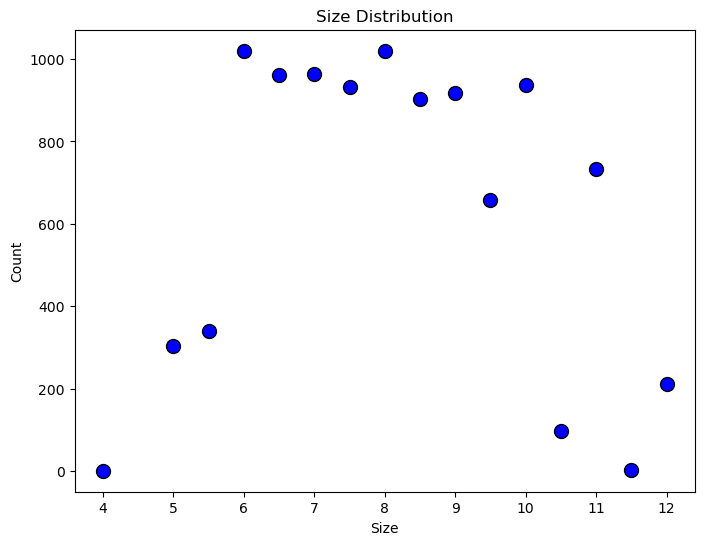

In [43]:
#data visualization


import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(size_counts.index, size_counts.values, s=100, color='b', edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.xticks(rotation=0)
plt.show()

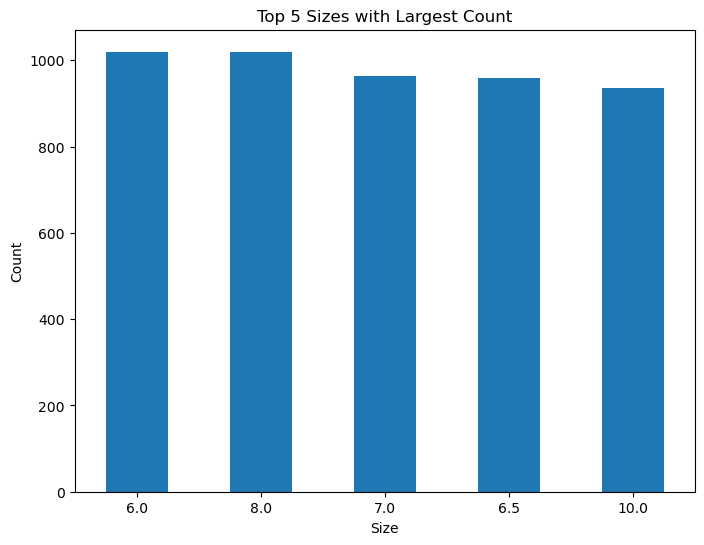

In [38]:
# data analysis 

import pandas as pd
import matplotlib.pyplot as plt

# Find the top 5 sizes with the largest count
top_sizes = df['prices.size'].value_counts().nlargest(5)

# Plot the top 5 sizes with the largest count
plt.figure(figsize=(8, 6))
top_sizes.plot(kind='bar')
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Top 5 Sizes with Largest Count')
plt.xticks(rotation=0)
plt.show()